<a href="https://colab.research.google.com/github/SoYeoni621/mulcam/blob/master/0427_init.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
!pip install pyyaml==5.1

     |████████████████████████████████| 274 kB 3.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=4663e579076fd9c0b3a89887f4e42160e889d1e5d4689d4a7a004268b9f8975b
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [92]:
!pip install bertopic

In [1]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-04-27 05:42:38--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-04-27 05:42:38--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc56837c3a750096c068b75e7d0c.dl.dropboxusercontent.com/cd/0/get/BkIQs9tA6xwgL1zJrfCyjqPA2bxEv2bjEsM-xVQWs5lMJ_MTmKy7qBnujAYK2TG7fO7Xdh165i3aCZtXZgJKx32TCRikK3PZVQoqTX2Pk8FdHSKO_YDW9q3uA_An_PEFnMchPAr6GTzejm_efrxIWpP1EY4yuszaDeqz5thkb5fSo7MLQBszGl4JiHAUT136QSQ/file?dl=1# [following]
--2022-04-27 05:42:39--  https://uc56837c3a750096c068b75e7d0c.dl.dropboxusercontent.com/cd/0/get/

In [3]:
!pip install transformers==4.10 --quiet --user

     |████████████████████████████████| 2.8 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 61.3 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 3.3 MB 34.8 MB/s 
     |████████████████████████████████| 895 kB 57.6 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.7 MB/s 
     |████████████████████████████████| 1.2 MB 33.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=fe40346bbfebcd0fcd39f2e343312fd7a8feea00d37ee885954dd6a5b8d88505
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers


In [5]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 175 kB 49.0 MB/s 
  Created wheel for kss: filename=kss-3.4.2-py3-none-any.whl size=42448069 sha256=e4c90fe14103578dae2c869445907854be266b7fc26fbc9bfe4dcf101434bfa9
  Stored in directory: /root/.cache/pip/wheels/ef/22/aa/6399b60516a067ec97fa6599fb2d472aeb25e3f9ee6dae3224
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=74da6b20fcb5a2989ea443ffe59a7b9f7581cbc14ac667ac512e2a8dc4cc9302
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built kss emoji


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import math
from konlpy.tag import Mecab

from torch.utils.data import DataLoader
from sentence_transformers import SentenceTransformer,  SentencesDataset, LoggingHandler, losses, util, InputExample, models
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging

In [2]:
# 6월 기사(주가상승)
df = pd.read_excel('/content/drive/MyDrive/프로젝트/naver dataset(21-01~22-03/네이버_210601~210630 테스트 데이터.xlsx')

# 클러스터링

In [3]:
train_batch_size = 16
num_epochs = 4
model_save_path = '/content/drive/MyDrive/프로젝트/output/kpfSBERT_nli'

In [4]:
model = SentenceTransformer(model_save_path)

In [5]:
corpus = []
for i in range(len(df)):
    sent = df['content'][i]
    corpus.append(sent)

In [6]:
from sklearn.cluster import KMeans

In [7]:
# 4개로 클러스터링
model_path = model_save_path

model = SentenceTransformer(model_path)

corpus_embeddings = model.encode(corpus)

num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['G마켓, 옥션을 운영하는 이베이코리아가 신세계그룹에 인수되며 유통 업계 판도가 크게 출렁이는 모습이다. 이로써 신세계는 단번에 업계 2위로 도약, 지분교환 동맹을 맺은 업계 1위 네이버와 함께 쿠팡을 압박하게 됐다. 그러나 업계 한쪽에서는 ‘승자의 저주’ 우려도 적잖다. 이번 인수가 사업 경쟁력 강화보다 쓱닷컴의 미국 상장 대박을 위한 사전 정지 작업 아니냐는 관측에서다. 이 경우 단기적으로는 쓱닷컴과 이마트의 기업가치 상승을 기대할 수 있으나, 중장기적으로는 사업 시너지 부족으로 사상누각이 될 수 있다는 우려가 제기된다. 이마트가 이베이코리아 인수 후 어떤 전략을 펼칠지를 두고 벌써부터 업계 주판알 튕기는 소리가 요란하다. 신세계그룹이 이베이코리아를 품는다. 3조5000억원에 지분 80%를 가져가는 형태다. 이커머스 시장에 어떤 충격을 줄지 세간의 관심이 집중되고 있다.', '네이버, 이베이코리아 인수 철회…신세계 단독 추진     홍지인 기자 = 네이버가 이베이코리아 인수 의사를 공식적으로 철회했다.     네이버는 22일 "당사는 사업 경쟁력 강화를 위한 일환으로 이베이코리아 지분 일부 인수 등을 검토했으나 최종적으로 인수 절차에 참여하지 않기로 했다"고 공시했다.     이로써 신세계그룹 이마트가 이베이코리아 인수를 단독으로 추진하게 됐다.    애초 네이버는 신세계와 손잡고 이베이코리아 인수에 나섰다.     네이버는 지난 17일 "이베이코리아 입찰에 참여는 했으나 참여방식 또는 최종 참여 여부에 대해 아직 결정된 바 없다"고 밝힌 바 있다.    그러나 애초 예상보다 인수 조건 협의 과정이 길어지면서 네이버가 중도에 발을 빼게 됐다.    이베이-신세계-네이버의 3자 구도보다는 이베이-신세계의 양자 간 협상을 통해 이번 인수 건을 원활히 매듭지으려는 의도로 알려졌다.     네이버 관계자는 "신세계와의 사업 협력은 변함없이 지속할 방침"이라고 말했다.      이베이코리아 매각 주요 일지 김영은 기자 =     페이스북 tun

In [8]:
cluster_label = clustering_model.labels_

In [9]:
df['Cluster_label'] = cluster_label

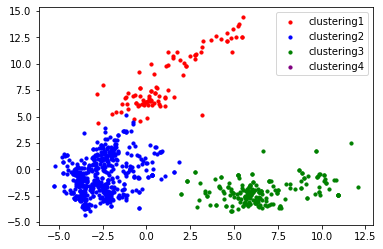

In [10]:
#pca(주성분 분석)으로 시각화하기
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2) # 2차원으로 축소
pc = pca.fit_transform(corpus_embeddings)
p_df = pd.DataFrame(data=pc, columns=['main1', 'main2'])
p_df.index=df['Cluster_label']

plt.scatter(p_df.iloc[clustering_model.labels_ == 0,0],
            p_df.iloc[clustering_model.labels_ == 0,1], s = 10, c = 'red', label = 'clustering1')
plt.scatter(p_df.iloc[clustering_model.labels_ == 1,0],
            p_df.iloc[clustering_model.labels_ == 1,1], s = 10, c = 'blue', label = 'clustering2')
plt.scatter(p_df.iloc[clustering_model.labels_ == 2,0],
            p_df.iloc[clustering_model.labels_ == 2,1], s = 10, c = 'green', label = 'clustering3')
plt.scatter(p_df.iloc[clustering_model.labels_ == 3,0],
            p_df.iloc[clustering_model.labels_ == 3,1], s = 10, c = 'purple', label = 'clustering4')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 4,0],
#             p_df.iloc[clustering_model.labels_ == 4,1], s = 10, c = 'black', label = 'clustering5')
# plt.scatter(p_df.iloc[clustering_model.labels_ == 5,0],
#             p_df.iloc[clustering_model.labels_ == 5,1], s = 10, c = 'grey', label = 'clustering6')

plt.legend()
plt.show()

In [11]:
df.loc[df['Cluster_label'] == 0]

,title,paper,date,url,content,Cluster_label
197,"이베이 인수 이마트, 네이버·쿠팡과 新3강…게임 체인저 vs 승자의 저주",매경인터넷,2021.06.29.,https://news.naver.com/main/read.naver?mode=LS...,"G마켓, 옥션을 운영하는 이베이코리아가 신세계그룹에 인수되며 유통 업계 판도가 크게...",0
253,"네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)",연합뉴스,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 이베이코리아 인수 철회…신세계 단독 추진 홍지인 기자 = 네이버가 ...",0
258,"네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)",연합뉴스,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 이베이코리아 인수 철회…신세계 단독 추진 홍지인 기자 = 네이버가 ...",0
277,"신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?",머니S,2021.06.24.,https://news.naver.com/main/read.naver?mode=LS...,신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...,0
280,"신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?",머니S,2021.06.24.,https://news.naver.com/main/read.naver?mode=LS...,신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...,0
...,...,...,...,...,...,...
818,"네이버, 이베이코리아 인수 포기…신세계 단독으로",media KHAN,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,네이버가 이베이코리아 인수에 참여하지 않겠다는 의사를 밝혔다. 네이버는 22일 “당...,0
831,"[속보]신세계·네이버 연합군, 이베이코리아 인수한다",Joins.com,2021.06.16.,https://news.naver.com/main/read.naver?mode=LS...,"정용진 신세계그룹 부회장과 이해진 네이버 창업주. , 연합뉴스 이베이코리...",0
834,"혈맹맺은 신세계·네이버, 쿠팡 누르고 이커머스 시장 양분하나",Joins.com,2021.06.16.,https://news.naver.com/main/read.naver?mode=LS...,"신세계·네이버, 이베이코리아 인수 후보 정용진 신세계그룹 부회장과 이해진 네이버 ...",0
846,"네이버 ""이베이코리아 인수 안한다""…신세계 단독 추진",MBN,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 22일 인수 의사 공식적으로 철회오늘 네이버가 ""당사는 사업 경쟁력 강화를...",0


In [12]:
df_0 = df.loc[df['Cluster_label'] == 0]
df_1 = df.loc[df['Cluster_label'] == 1]
df_2 = df.loc[df['Cluster_label'] == 2]

In [13]:
df_0.reset_index(inplace=True)
df_1.reset_index(inplace=True)
df_2.reset_index(inplace=True)

In [14]:
df_0.dropna(inplace=True)
df_0.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
df_0['Words'] = ''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
test = mecab.pos(df_0['content'][0])

In [78]:
test[10][0]

'만들'

In [20]:
mecab=Mecab()

tags=['NNG', 'NNP']
stopwords=['네이버']

for i in range(len(df_0)):
    words = mecab.pos(df_0['content'][i])
    token_words = []
    for ii in range(len(words)):
        if words[ii][1] in tags and len(words[ii][0]) > 1 and words[ii][0] not in stopwords:
            token_words.append(words[ii][0])
    df_0['Words'][i] = token_words

In [21]:
df_0

,level_0,index,title,paper,date,url,content,Cluster_label,Words
0,0,197,"이베이 인수 이마트, 네이버·쿠팡과 新3강…게임 체인저 vs 승자의 저주",매경인터넷,2021.06.29.,https://news.naver.com/main/read.naver?mode=LS...,"G마켓, 옥션을 운영하는 이베이코리아가 신세계그룹에 인수되며 유통 업계 판도가 크게...",0,"[마켓, 옥션, 운영, 이베이, 코리아, 신세계그룹, 인수, 유통, 업계, 판도, ..."
1,1,253,"네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)",연합뉴스,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 이베이코리아 인수 철회…신세계 단독 추진 홍지인 기자 = 네이버가 ...",0,"[이베이, 코리아, 인수, 철회, 신세계, 단독, 추진, 홍지, 기자, 이베이, 코..."
2,2,258,"네이버, 이베이코리아 인수 철회…신세계 단독 추진(종합)",연합뉴스,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 이베이코리아 인수 철회…신세계 단독 추진 홍지인 기자 = 네이버가 ...",0,"[이베이, 코리아, 인수, 철회, 신세계, 단독, 추진, 홍지, 기자, 이베이, 코..."
3,3,277,"신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?",머니S,2021.06.24.,https://news.naver.com/main/read.naver?mode=LS...,신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...,0,"[신세계그룹, 이마트, 이베이, 코리아, 인수, 추진, 인수, 계획, 철회, 사진,..."
4,4,280,"신세계, 네이버 빼고 이베이코리아 단독 인수… 승자의 저주 없을까?",머니S,2021.06.24.,https://news.naver.com/main/read.naver?mode=LS...,신세계그룹 이마트와 함께 이베이코리아 인수를 추진하던 네이버가 인수 계획을 철회했다...,0,"[신세계그룹, 이마트, 이베이, 코리아, 인수, 추진, 인수, 계획, 철회, 사진,..."
...,...,...,...,...,...,...,...,...,...
89,89,818,"네이버, 이베이코리아 인수 포기…신세계 단독으로",media KHAN,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,네이버가 이베이코리아 인수에 참여하지 않겠다는 의사를 밝혔다. 네이버는 22일 “당...,0,"[이베이, 코리아, 인수, 참여, 의사, 당사, 사업, 경쟁력, 강화, 일환, 이베..."
90,90,831,"[속보]신세계·네이버 연합군, 이베이코리아 인수한다",Joins.com,2021.06.16.,https://news.naver.com/main/read.naver?mode=LS...,"정용진 신세계그룹 부회장과 이해진 네이버 창업주. , 연합뉴스 이베이코리...",0,"[정용진, 신세계그룹, 부회장, 이해진, 창업주, 연합뉴스, 이베이, 코리아, 인수..."
91,91,834,"혈맹맺은 신세계·네이버, 쿠팡 누르고 이커머스 시장 양분하나",Joins.com,2021.06.16.,https://news.naver.com/main/read.naver?mode=LS...,"신세계·네이버, 이베이코리아 인수 후보 정용진 신세계그룹 부회장과 이해진 네이버 ...",0,"[신세계, 이베이, 코리아, 인수, 후보, 정용진, 신세계그룹, 부회장, 이해진, ..."
92,92,846,"네이버 ""이베이코리아 인수 안한다""…신세계 단독 추진",MBN,2021.06.22.,https://news.naver.com/main/read.naver?mode=LS...,"네이버, 22일 인수 의사 공식적으로 철회오늘 네이버가 ""당사는 사업 경쟁력 강화를...",0,"[인수, 의사, 공식, 철회, 당사, 사업, 경쟁력, 강화, 일환, 이베이, 코리아..."


# BERTopic

In [19]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Mecab
from bertopic import BERTopic

In [83]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        sent = sent[:1000000]
        word_tokens = self.tagger.morphs(sent)
        result = [word for word in word_tokens if len(word) > 1]
        return result

In [36]:
documents = []
for i in range(len(df_0)):
    documents.append(df_0['content'][i])

In [31]:
sent = df_0['content'][0]
word_tokens = mecab.pos(sent)
tagging = ['NNG', 'NNP']
stopwords=['네이버']

result = [word_tokens[i][0] for i in range(len(word_tokens)) if len(word_tokens[i][0]) > 1 and word_tokens[i][1] in tagging and word_tokens[i][0] not in stopwords]
print(result)

['마켓', '옥션', '운영', '이베이', '코리아', '신세계그룹', '인수', '유통', '업계', '판도', '모습', '신세계', '업계', '도약', '지분', '교환', '동맹', '업계', '쿠팡', '압박', '업계', '한쪽', '승자', '저주', '우려', '이번', '인수', '사업', '경쟁력', '강화', '닷컴', '미국', '상장', '대박', '사전', '정지', '작업', '관측', '경우', '단기', '닷컴', '이마트', '기업', '가치', '상승', '기대', '장기', '사업', '시너지', '부족', '사상누각', '우려', '제기', '이마트', '이베이', '코리아', '인수', '전략', '업계', '주판알', '소리', '요란', '신세계그룹', '이베이', '코리아', '지분', '형태', '커머스', '시장', '충격', '세간', '관심', '집중']


In [32]:
class CustomTokenizer:
    def __init__(self, tagger):
        self.tagger = tagger
    def __call__(self, sent):
        sent = sent[:1000000]
        tagging = ['NNG', 'NNP']
        stopwords = ['네이버']
        word_tokens = self.tagger.pos(sent)
        result = [word_tokens[i][0] for i in range(len(word_tokens)) if len(word_tokens[i][0]) > 1 and word_tokens[i][1] in tagging and word_tokens[i][0] not in stopwords]
        return result

In [33]:
custom_tokenizer = CustomTokenizer(Mecab())

In [34]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer, max_features=3000)

In [35]:
model = BERTopic(embedding_model="sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens", \
                 vectorizer_model=vectorizer,
                 nr_topics=5,
                 top_n_words=10,
                 calculate_probabilities=True)

In [37]:
topics, probs = model.fit_transform(documents)

Downloading:   0%|          | 0.00/574 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/527 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [38]:
model.visualize_topics()

In [39]:
model.visualize_distribution(probs[0])

In [40]:
for i in range(0, 5):
  print(i,'번째 토픽 :', model.get_topic(i))

0 번째 토픽 : [('이베이', 0.08455536868501883), ('이마트', 0.08241871649282145), ('인수', 0.08173401444998753), ('코리아', 0.06536651015652628), ('참여', 0.06344697497427249), ('입찰', 0.05935806735209202), ('쇼핑', 0.0522086145654965), ('롯데', 0.04787133791931773), ('지분', 0.04080617630668894), ('쿠팡', 0.038858349346748665)]
1 번째 토픽 : [('인수', 0.09147908510760303), ('이베이', 0.08747512097758428), ('코리아', 0.08270551402433726), ('이마트', 0.0520320789313704), ('참여', 0.04745218267732475), ('물류', 0.0436649917939582), ('지분', 0.04286029492201767), ('신세계', 0.039254467015230145), ('업계', 0.03672040445188087), ('최종', 0.036491468275705485)]
2 번째 토픽 : [('이베이', 0.08677631909999822), ('인수', 0.08137695231229074), ('코리아', 0.07419228400576164), ('신세계', 0.07057876494564809), ('이마트', 0.05655394353939576), ('참여', 0.0400472702936642), ('시장', 0.0361050153675153), ('온라인', 0.03594396099115063), ('커머스', 0.03455248156256555), ('오프라인', 0.03408092805503159)]
3 번째 토픽 : [('인수', 0.10932423540810089), ('이베이', 0.0999951555034677), ('코리아', 0.09434

# BERTopic df_1 클러스터링

In [48]:
documents = []
for i in range(len(df_1)):
    documents.append(df_1['content'][i])

In [49]:
topics, probs = model.fit_transform(documents)

In [46]:
df_1.dropna(inplace=True)
df_1.reset_index(inplace=True)

In [50]:
model.visualize_topics()

In [51]:
model.visualize_distribution(probs[0])

In [52]:
for i in range(0, 5):
  print(i,'번째 토픽 :', model.get_topic(i))

0 번째 토픽 : [('물류', 0.03475962130153705), ('웹툰', 0.0336510876098808), ('센터', 0.03318499700302941), ('서비스', 0.03266633262041782), ('콘텐츠', 0.028236383680248014), ('시장', 0.027321125129726703), ('정보', 0.025477729690148613), ('검색', 0.023811367964731923), ('제공', 0.02309945062945412), ('기술', 0.022517809150025495)]
1 번째 토픽 : [('카카오', 0.11420446980556012), ('주가', 0.05531074149609406), ('상승', 0.04980542982283286), ('시가총액', 0.0412193193986628), ('가치', 0.037637943584158354), ('사업', 0.03703967769092887), ('투자', 0.03624197357423176), ('기업', 0.03577240149509784), ('연구원', 0.03520905951229481), ('성장', 0.03501025711680681)]
2 번째 토픽 : [('언론사', 0.1455181947574711), ('뉴스', 0.13647584206795915), ('추천', 0.09629771269518715), ('기사', 0.08615194676406787), ('포털', 0.06824073089184499), ('도리도리', 0.06414283270984633), ('사이트', 0.06334158304057504), ('설정', 0.06160670995584365), ('이용자', 0.050375794810826685), ('미디어', 0.042908474110654536)]
3 번째 토픽 : [('클라우드', 0.22073679863343212), ('서비스', 0.09934261918096653), ('생명', 0

# df_2 클러스터링

In [53]:
documents = []
for i in range(len(df_2)):
    documents.append(df_2['content'][i])

In [56]:
topics, probs = model.fit_transform(documents)

In [58]:
model.visualize_distribution(probs[0])

In [59]:
for i in range(0, 5):
  print(i,'번째 토픽 :', model.get_topic(i))

0 번째 토픽 : [('직원', 0.07320653538629963), ('조사', 0.06482012053020308), ('사건', 0.05761096095212666), ('조직', 0.054125771950111715), ('책임', 0.051345231269683614), ('문화', 0.05099358766645575), ('결과', 0.048865469607441), ('임원', 0.04759466289966443), ('책임자', 0.04727857385917778), ('직장', 0.04559205862182507)]
1 번째 토픽 : [('노조', 0.08123001699013498), ('임원', 0.07525484675428011), ('책임', 0.05444968601078941), ('조사', 0.05326411451436392), ('고인', 0.052886806661145674), ('직원', 0.04849045249315692), ('업무', 0.048251834057302656), ('대표', 0.04791002430339226), ('요구', 0.04486659823928499), ('사건', 0.04466812618547411)]
2 번째 토픽 : False
3 번째 토픽 : False
4 번째 토픽 : False
